# Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**Statement Analysis**
* Supervised Machine Learning Problem.
* The Target Value is Item_Outlet_Sales.

**Goal**
* Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation 
- **Item weight:** Item weight might effect a sales of the product.
- **Items fat content:** Sales of the product may be depends on the items fat content.
- **Item_Visibility:** More Item_Visibility of a particular product may be costlier than other products.
- **Item type:** Item type could have an effect on the sales.
- **Item MRP:** Are the items with more MRP have more item outlet sales.
- **Stores established:** Are the stores which have established earlier have more sales.
- **Size of the stores:** Size of the stores could have an effect on the item sales at a particular store.
- **Location:** Location of the stores might depends on the Item outlet sales.
- **Sales:** Are the supermarkets have more sales than others.


- **City Type:** Stores located in urban should have higher Sales.
- **Store Location:** Store located in popular market place shoud have higher Sales
- **Populted City:** City with high population should have higher Sales.
- **Store Size:** Stores with large size should have higher Sales.
- **Staff:** Stores with more staff should have higher Sales.
- **Branded Products:** Branded Products will have higher Sales.
- **Product Visbility:** Products with large space should have higher Sales.
- **Product Frequency:** More frequnct products will have high Sales.
- **Utilities:** Daily Basic Products should have higher Sales.
- **Promotional Offers:** Promo Products should have higher Sales.

This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their Description

- **Item_Identifier:** Unique product ID
- **Item_Weight :** Weight of product
- **Item_Fat_Content :** Checks the Concentration of fat in the product
- **Item_Visibility :** The % of total display area of all similar products in a store
- **Item_Type:** Category
- **Item_MRP :** Maximum Retail Price for a Product
- **Outlet_Identifier :** Store ID
- **Outlet_Establishment_Year :** The year in which store was established
- **Outlet_Size :** The size of the store (Area Size Category)
- **Outlet_Location_Type :** In Terms of city Tiers (Size)
- **Outlet_Type :** Grocery store or a type of supermarket
- **Item_Outlet_Sales :** Sales of the product In the Specific outlet

# Loading Packages and Dataset

In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings  # warning filter
import matplotlib.pyplot as plt # Data visulization
import seaborn as sns # Data visulization
%matplotlib inline

#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Cross Validation
from sklearn.model_selection import cross_val_score as CVS

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


In [2]:
# Importing data
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Rows and columns
print(f'Training Dataset = (row, col): {df_train.shape} \n\nTesting Dataset = (row, col): {df_test.shape}')

Training Dataset = (row, col): (8523, 12) 

Testing Dataset = (row, col): (5681, 11)


* The train data consists of 8,523 training with 12 features.
* The test data consists of 5,681 training with 11 features.

In [6]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

* Above you can see Name of features clearly in a data dictionary

# Data Structure and Content

**get statistics from the data**

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>],
       [<AxesSubplot: title={'center': 'Item_Outlet_Sales'}>,
        <AxesSubplot: >]], dtype=object)

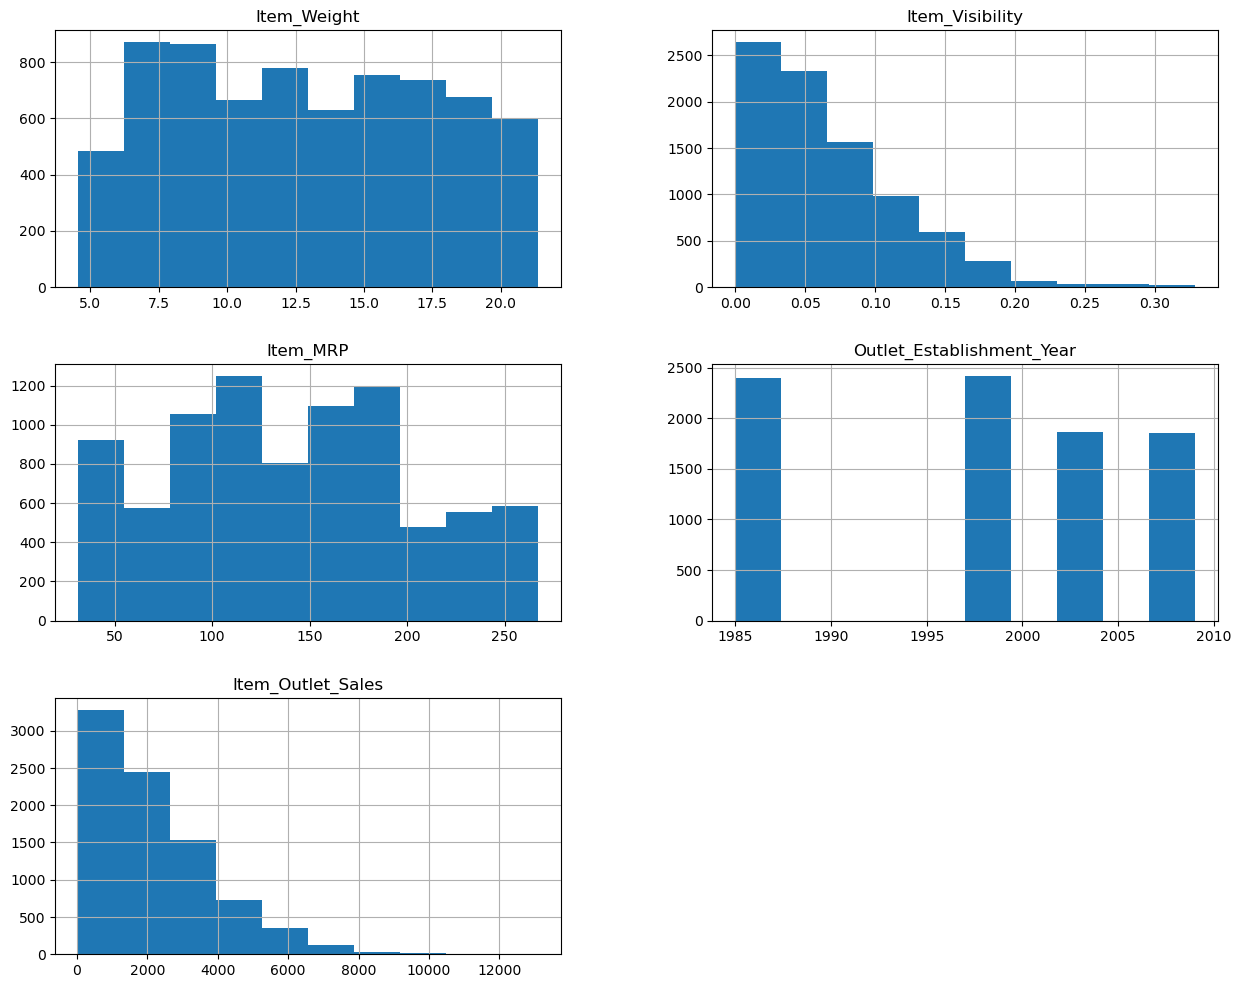

In [12]:
df_train.hist(figsize=(15,12))

array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

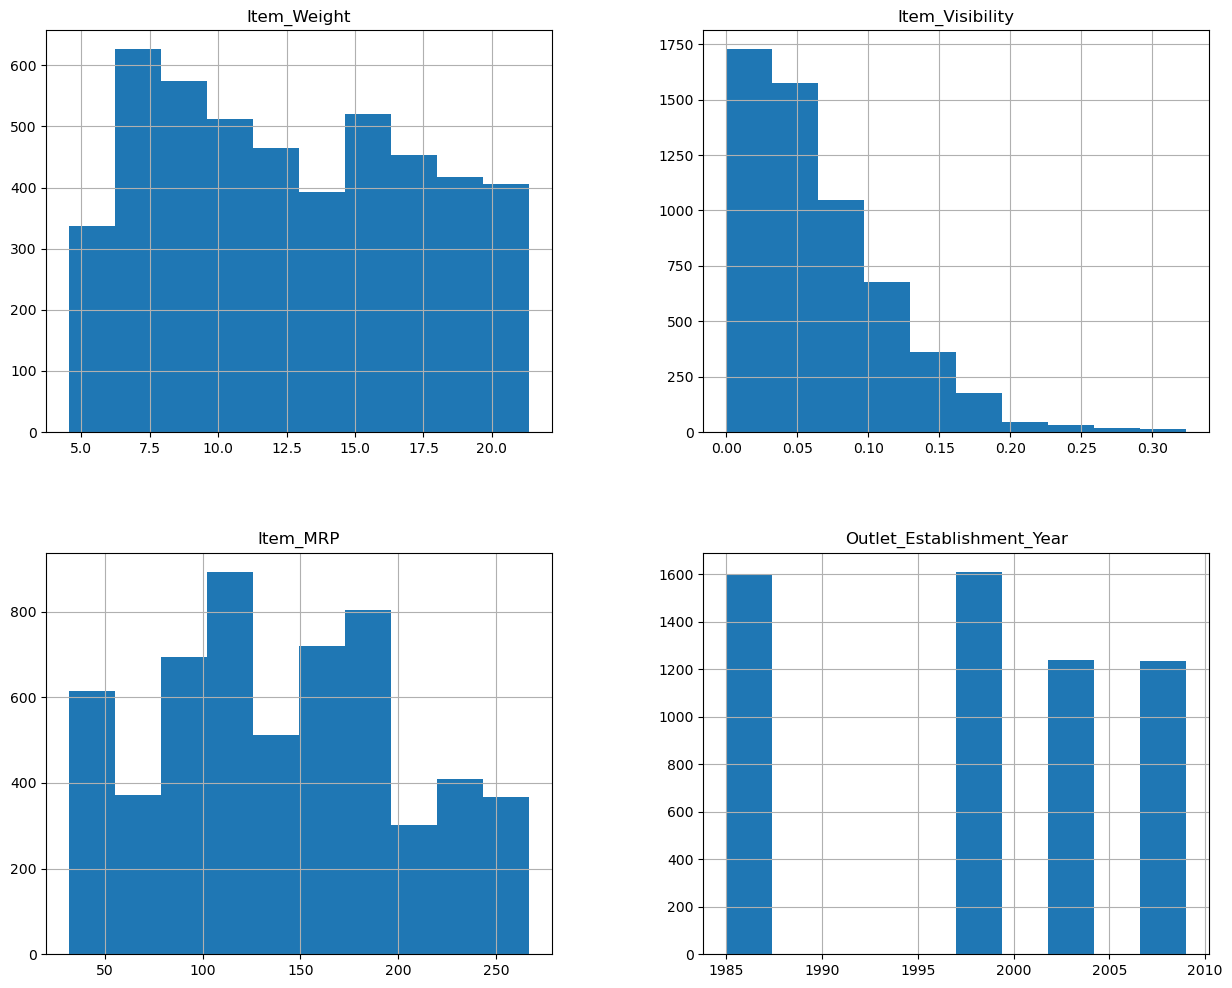

In [13]:
df_test.hist(figsize=(15,12))

# Exploratory Data Analysis


Below are the steps involved to understand, clean and prepare your data for building your predictive model:

- Unique values 
- Checking for NULL values
- Check for Outlier
- Univariate Analysis
- Bi-variate Analysis



 **Unique values**

In [14]:
print(df_train['Item_Fat_Content'].unique())
print(df_train['Item_Type'].unique())
print(df_train['Outlet_Establishment_Year'].sort_values().unique())
#print(train_data['Outlet_Size'].unique())
print(df_train['Outlet_Location_Type'].unique())
print(df_train['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [15]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF', 'Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg', 'Regular')

# Missing Value Treatment

 **Checking for NULL values**


In [16]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> ITEM WEIGHT, OUTLET SIZE contains null values.

In [17]:
# Checking percentage of NULL values
print("Item Weight NULL value percentage", 1463/8523)
print("Outlet Size NULL value percentage", 2410/8523)

Item Weight NULL value percentage 0.1716531737651062
Outlet Size NULL value percentage 0.2827642848762173


> As there are more than 5% NULL values, so we cannot delete those rows and needs to impute them.

- ITEM WEIGHT is a numeric column, so it needs to be imputed with MEAN or MEDIAN or MODE. (MODE is considered more usefull during imputing)

- OUTLET SIZE is a categorical column, so it need to be imputed with MODE.

In [18]:
print(df_train['Item_Weight'].mode())
print(df_train['Outlet_Size'].mode())

0    12.15
Name: Item_Weight, dtype: float64
0    Medium
Name: Outlet_Size, dtype: object


In [19]:
# Imputing the columns
df_train['Item_Weight']=df_train['Item_Weight'].fillna(12.15)
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna('Medium')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
df_train.isna().sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              228
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Item_Outlet_Sales              0
Baking Goods                   0
Breads                         0
Breakfast                      0
Canned                         0
Dairy                          0
Frozen Foods                   0
Fruits and Vegetables          0
Hard Drinks                    0
Health and Hygiene             0
Household                      0
Meat                           0
Others                         0
Seafood                        0
Snack Foods                    0
Soft Drinks                    0
Starchy Foods                  0
OUT010                         0
OUT013                         0
OUT017                         0
OUT018                         0
OUT019                         0
OUT027                         0
OUT035    

In [53]:
# Checking percentage of NULL values
print("Item_Visibility  NULL value percentage", 228/8523)

Item_Visibility  NULL value percentage 0.026751143963393172


In [54]:
print(df_train['Item_Visibility'].mode())

0    0.0
Name: Item_Visibility, dtype: float64


In [55]:
df_train['Item_Visibility']=df_train['Item_Visibility'].fillna(0.0)

In [56]:
df_train.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Outlet_Sales            0
Baking Goods                 0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
OUT010                       0
OUT013                       0
OUT017                       0
OUT018                       0
OUT019                       0
OUT027                       0
OUT035                       0
OUT045                       0
OUT046  

**Check for Outliers**

Item_Weight                     AxesSubplot(0.125,0.11;0.133621x0.77)
Item_Visibility              AxesSubplot(0.285345,0.11;0.133621x0.77)
Item_MRP                      AxesSubplot(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            AxesSubplot(0.766379,0.11;0.133621x0.77)
dtype: object

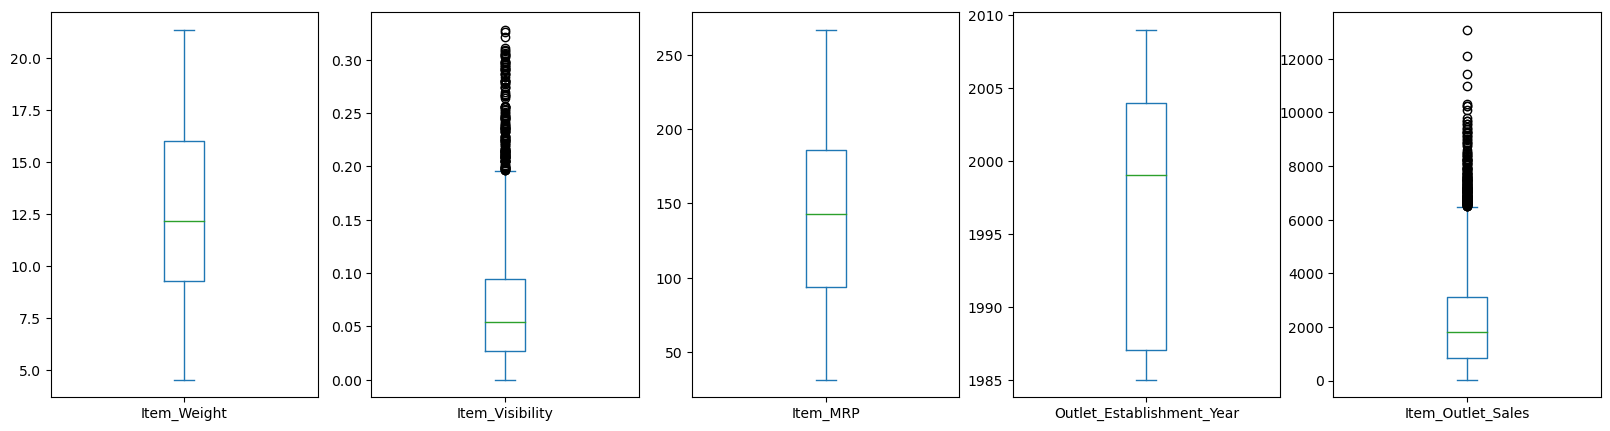

In [22]:
df_train.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

> In ITEM OUTLET SALES the outliers can remain there as in some season the sales jump abruptly.

In [23]:
# Removing Outliers
df_train['Item_Visibility']=df_train[df_train['Item_Visibility']<0.18]['Item_Visibility']

In [24]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Data Visualization

# Univariate Analysis

array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

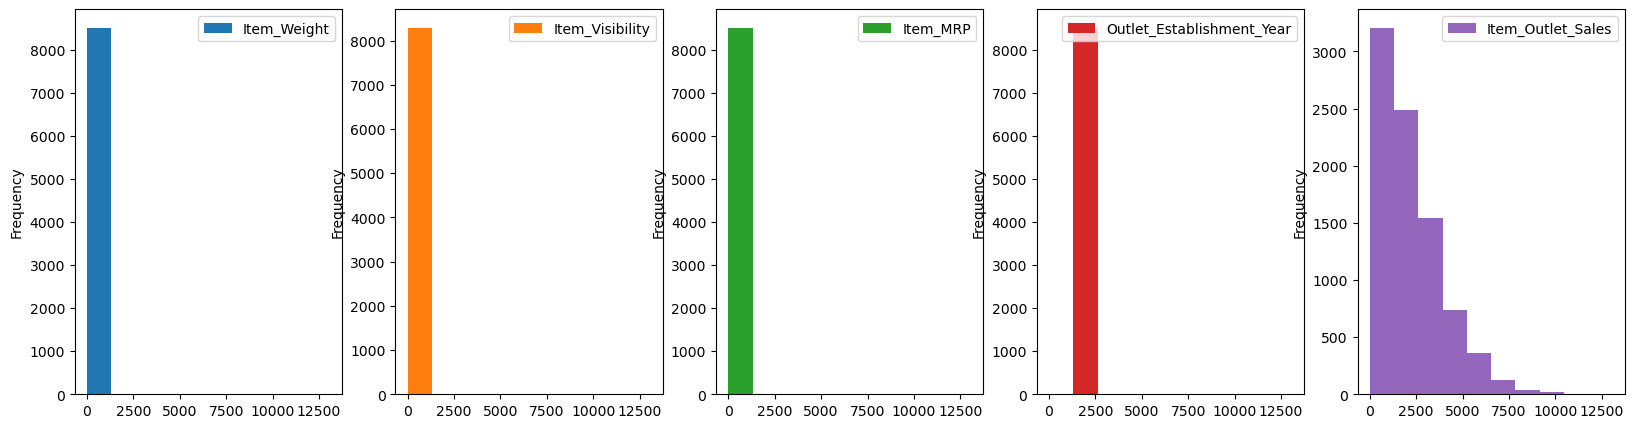

In [25]:
df_train.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

> ITEM VISIBLITY, ITEM MRP and OUTLET ESTABLISHMENT YEAR are having similar data in the dataset. While ITEM OUTLET SALES is having some very high values like 10000, which can happen. As during some festival seasons the sales can increase exponentially. So, we won't drop those high values nor would impute them.

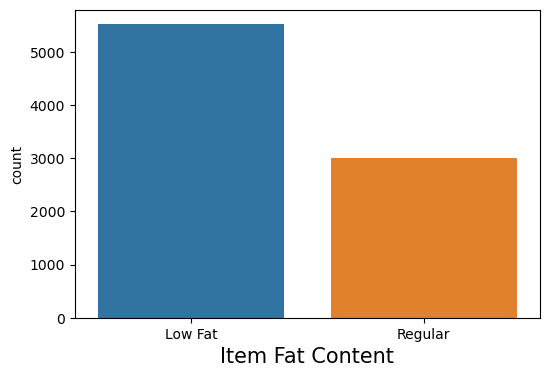

In [26]:
# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

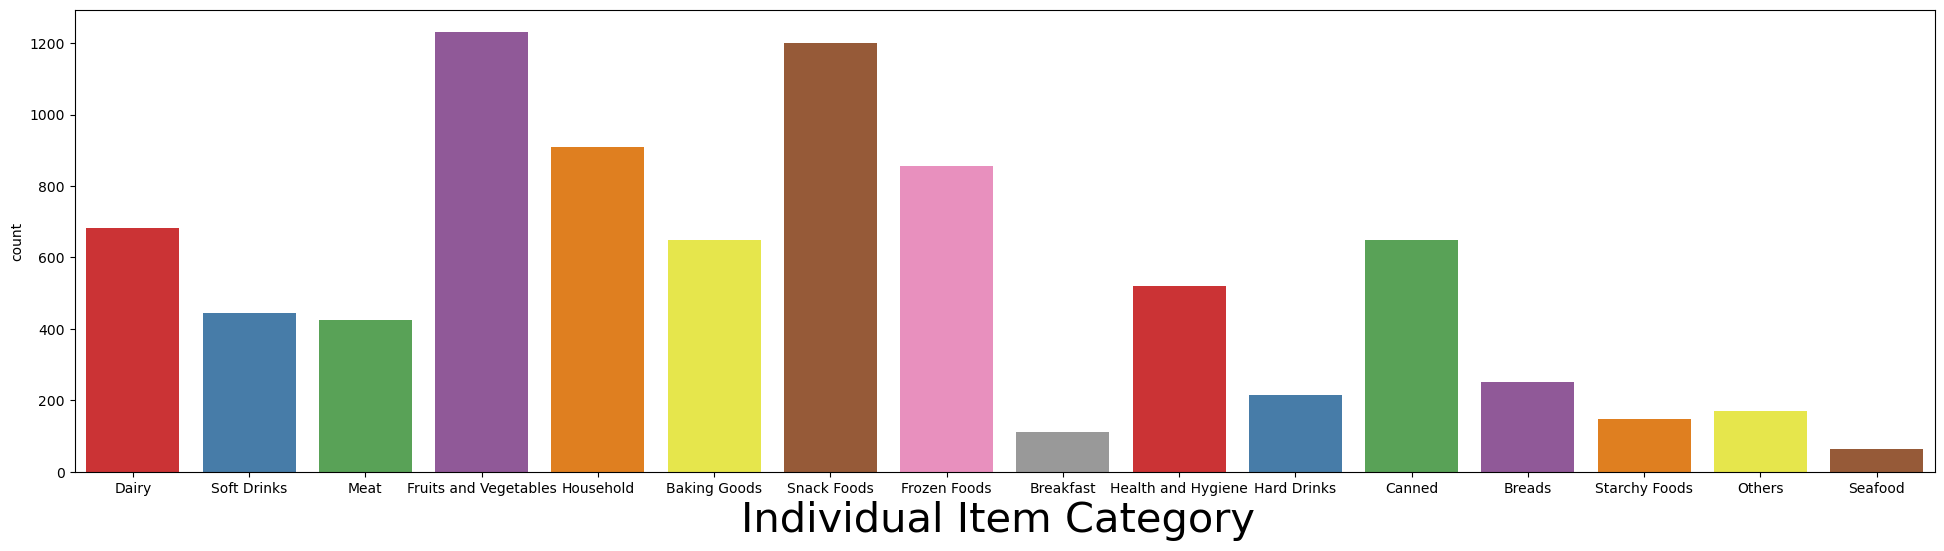

In [27]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=df_train, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

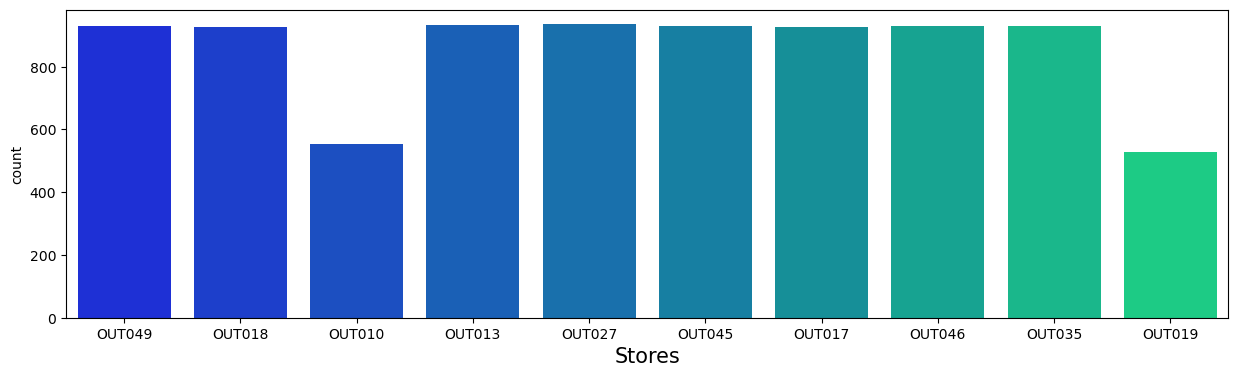

In [28]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=df_train, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

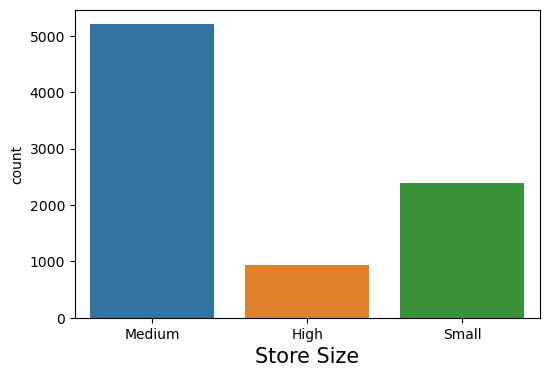

In [29]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

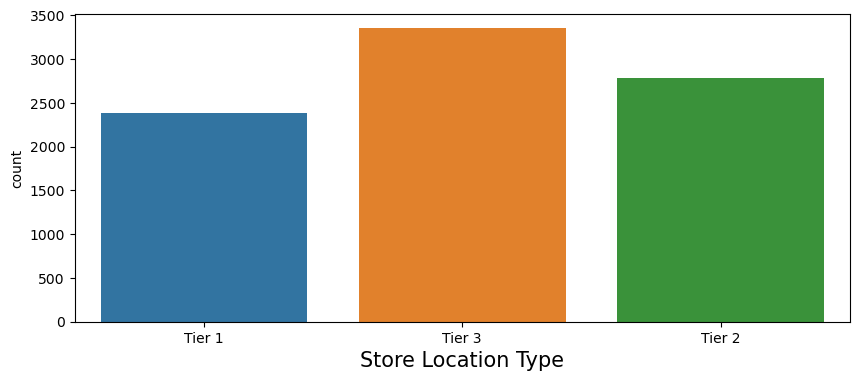

In [30]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

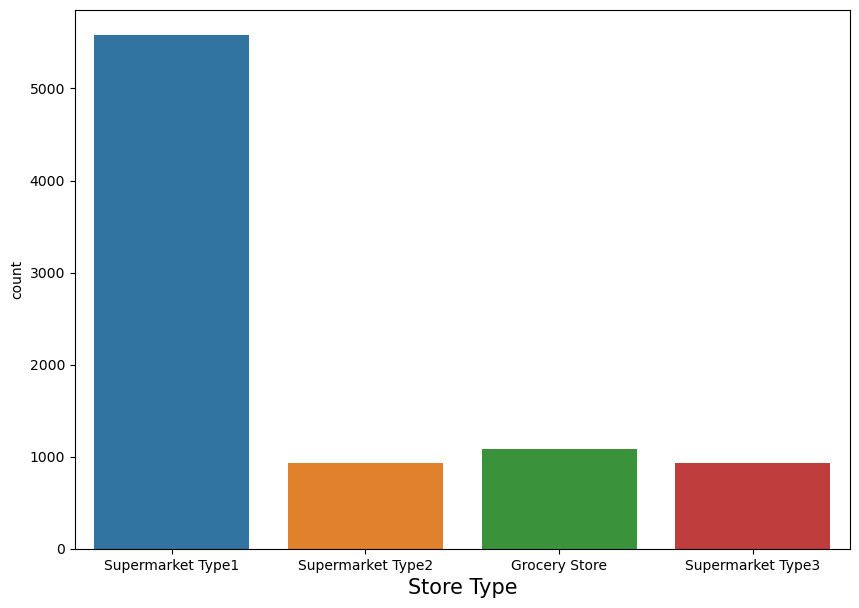

In [31]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=df_train, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

- Item_Fat_Content: Most Items sold are low Fat.
- Item_Type: Distictly fruits & veg, food snacks are popular.
- Item_Type_Combined: Most Sold Item cateogory is food.
- Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT010 and OUT019.
- Outlet_Size: Bigmart Stores are mostly in medium size in this data.
- Outlet_Location_Type: Most comon type of location is Tier3
- Outlet_Type: By a wide mergin Most Store Types are SuperMarket Type1.

# Bivariate Analysis

<AxesSubplot: >

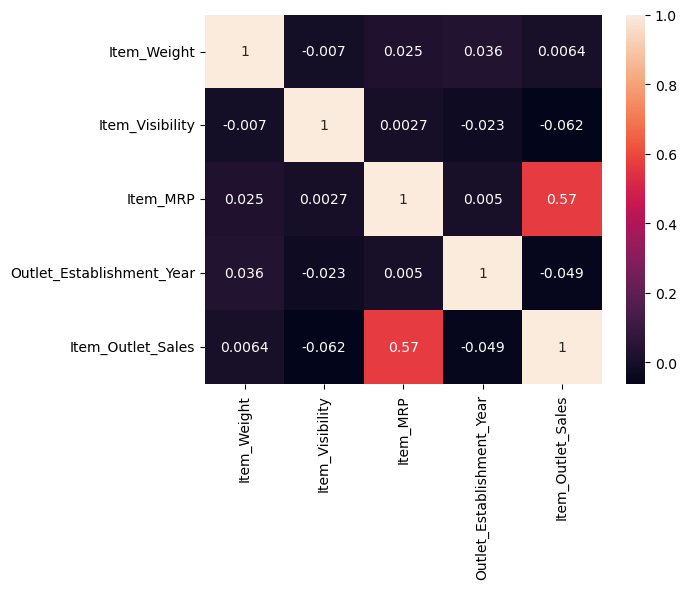

In [32]:
import seaborn as sns
df=df_train.corr()
sns.heatmap(df, annot=True)

> We can see that none of the Input features is having high correlation factor (> 0.6) with the Output features.

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

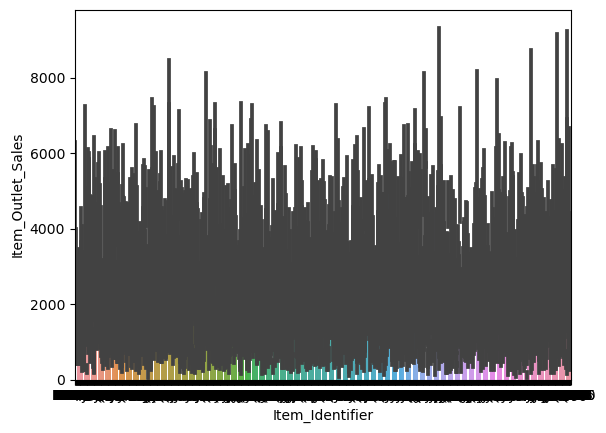

In [33]:
sns.barplot(x=df_train['Item_Identifier'], y=df_train['Item_Outlet_Sales'])
df_train['Item_Identifier'].value_counts()

> So, we can see that the ITEM IDENTIFIER is not of so much importance wrt to Output feature.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

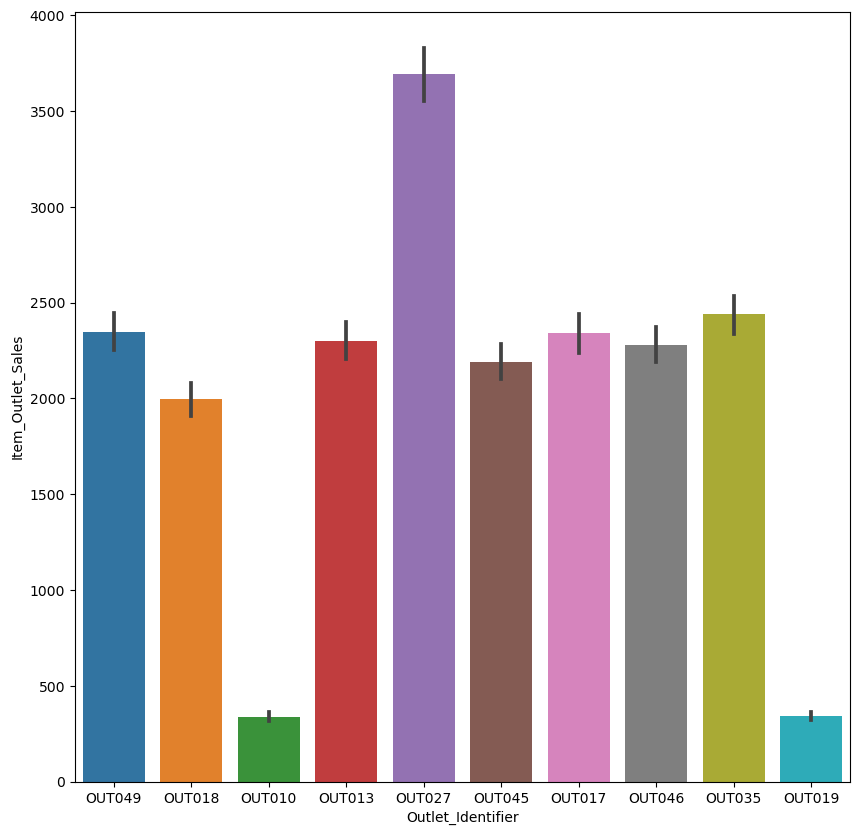

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=df_train['Outlet_Identifier'], y=df_train['Item_Outlet_Sales'])
df_train['Outlet_Identifier'].value_counts()

> So, we can consider OUTLET IDENTIFIER for Model creation as there are very limited types and for some Outlets the sale is comparitively high

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


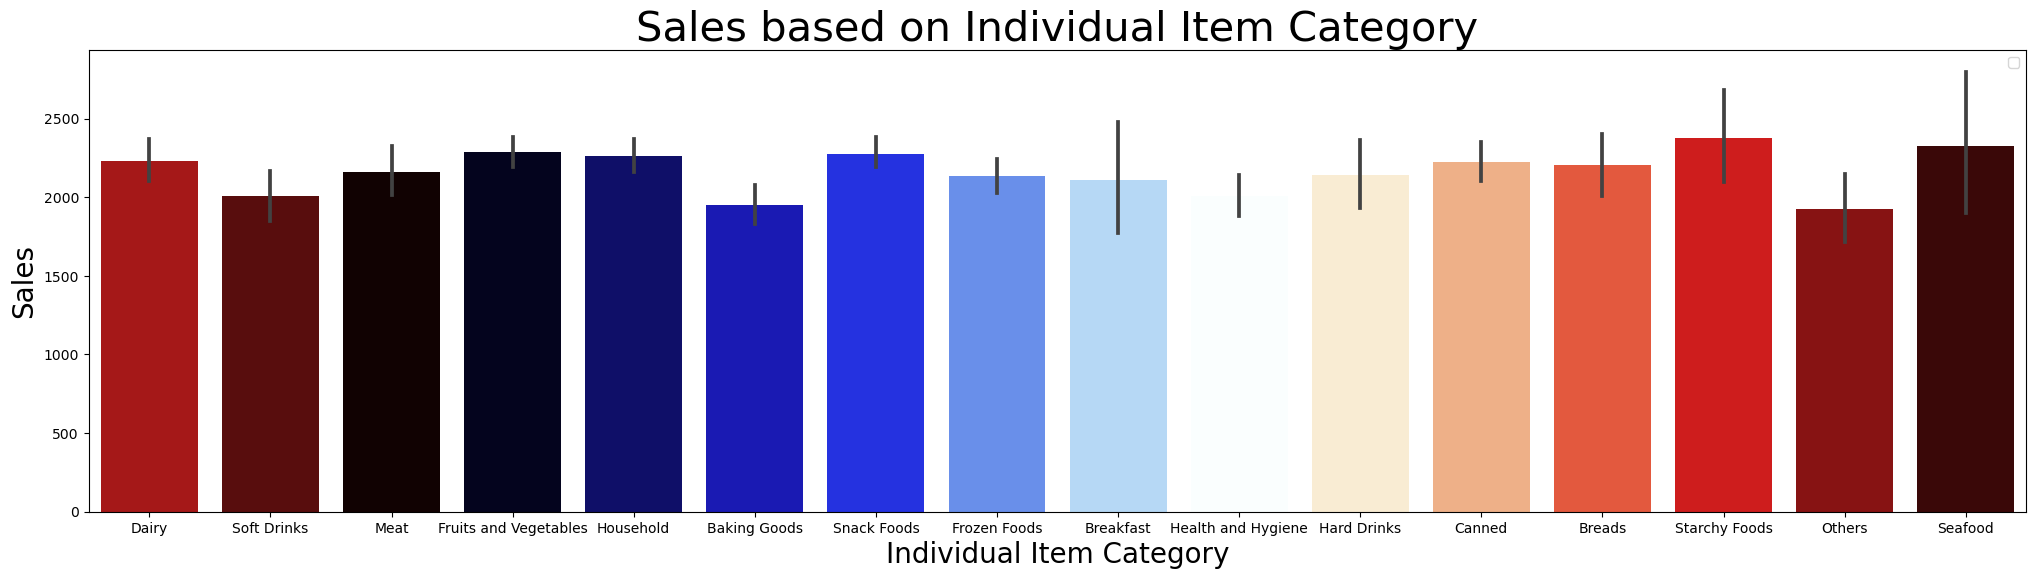

In [35]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=df_train,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


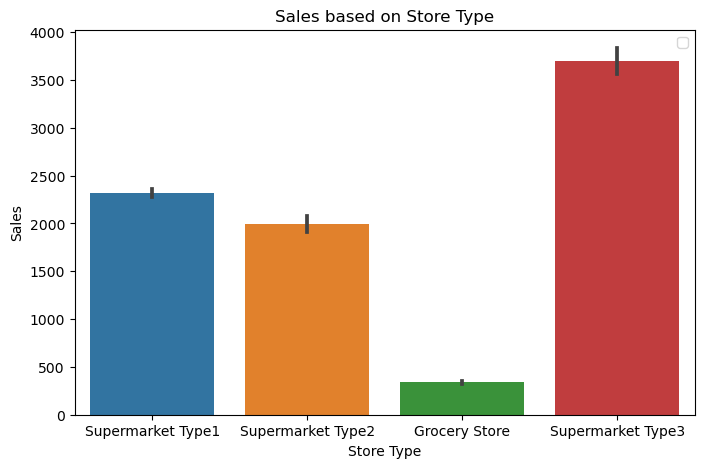

In [36]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=df_train,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


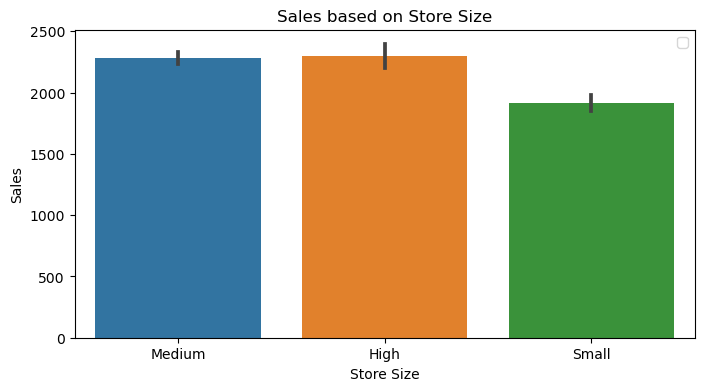

In [37]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=df_train,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


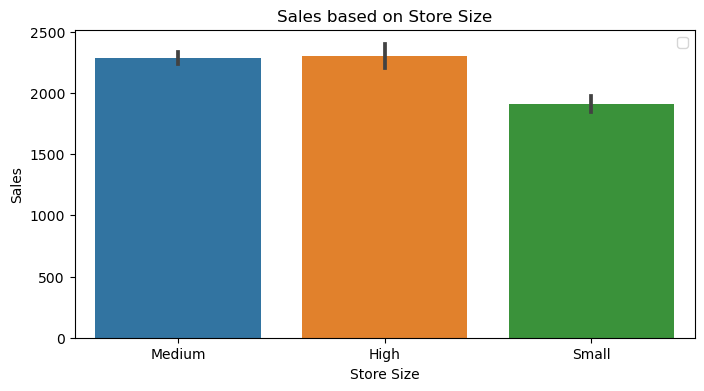

In [38]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=df_train,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

- Item_Type_Combined: Based on Categories, Food has most Sells, But difference is very small.
- Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
- Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.
- Outlet_Size: Sells are mostly even in Medium and High size Stores.
- Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.

# Removing useless columns

In [39]:
df_train=df_train.drop('Item_Identifier', axis=1)

# Multivariate plots.


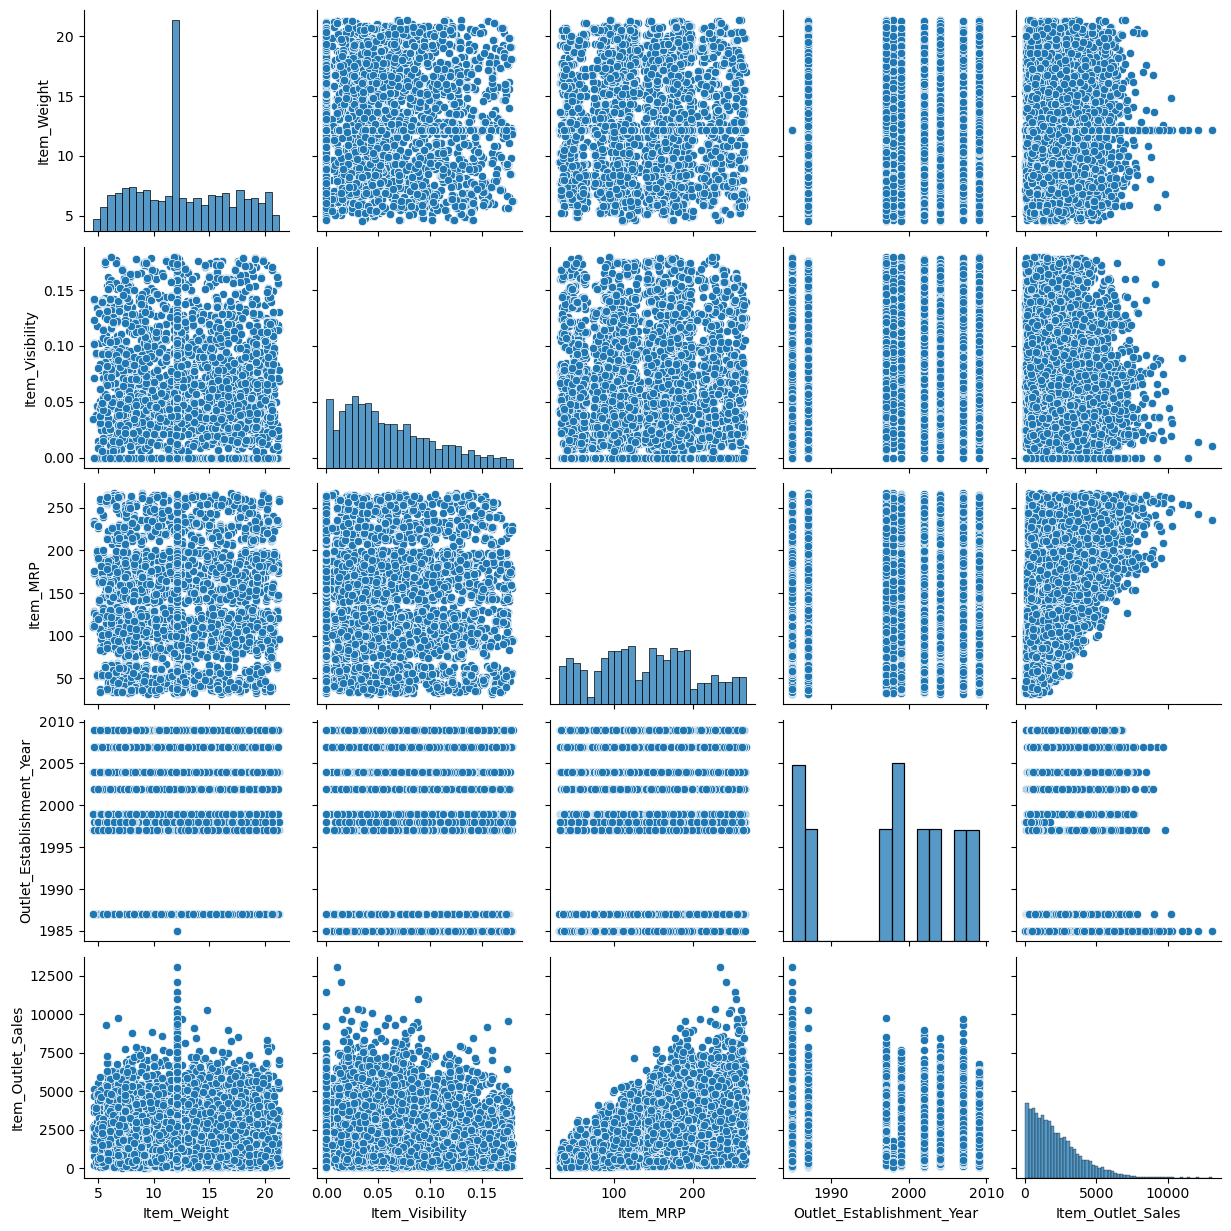

In [40]:
sns.pairplot(df_train)

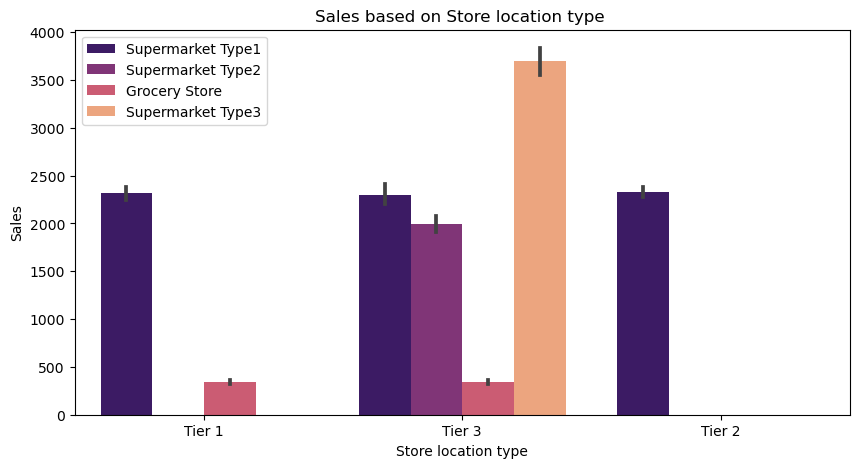

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

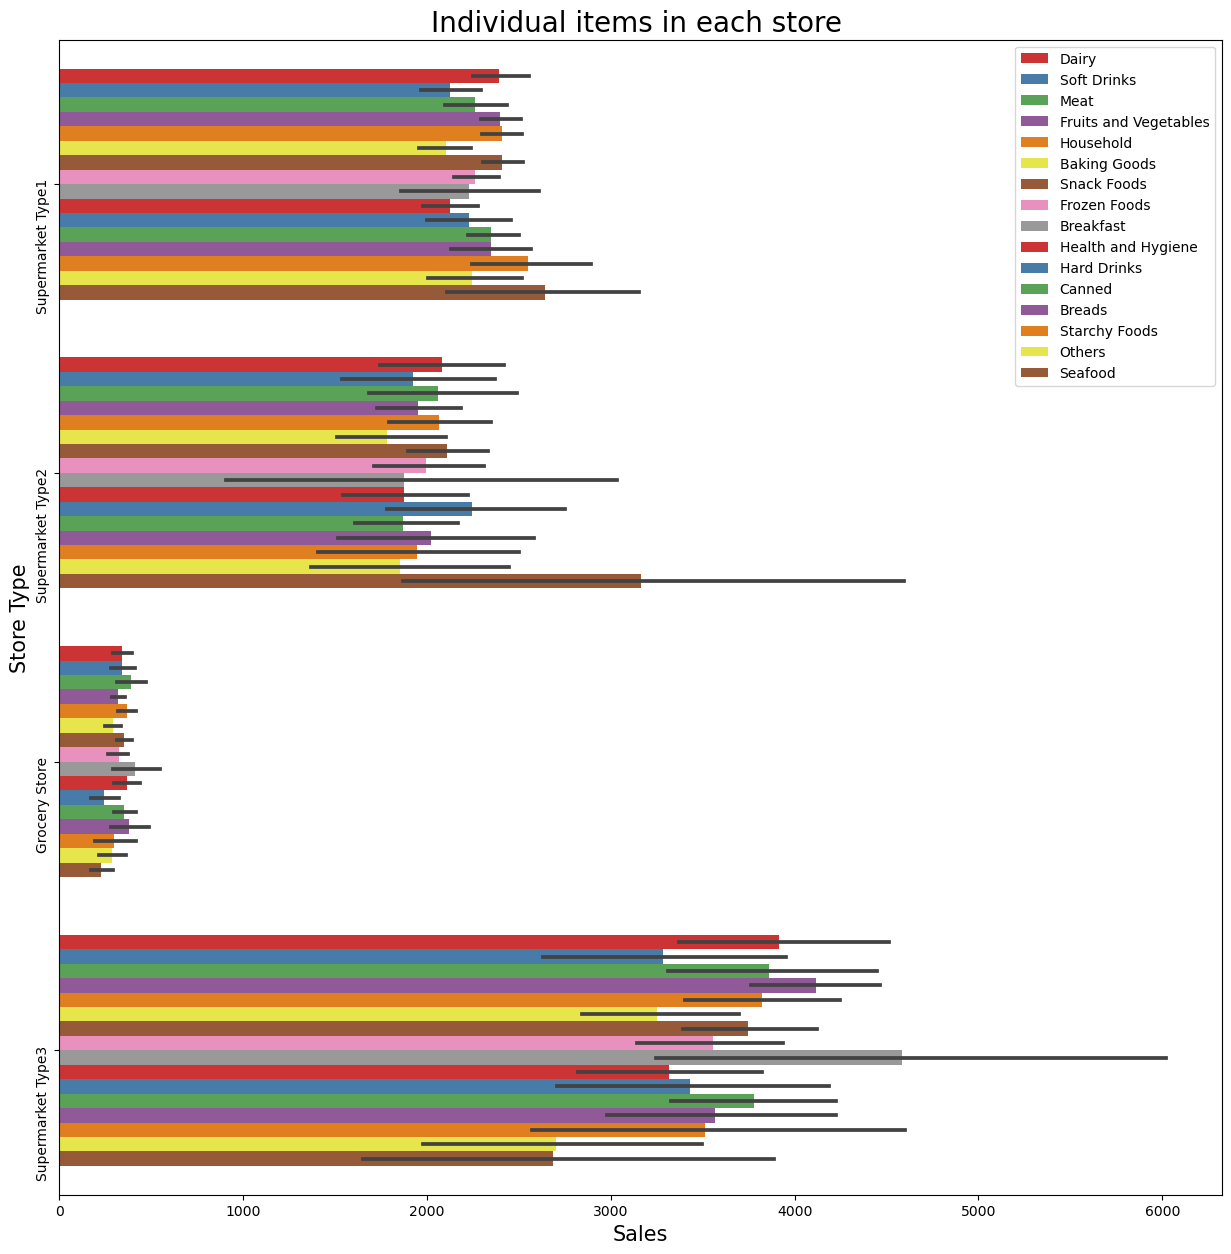

In [42]:
plt.figure(figsize=(15,15))
sns.barplot(data=df_train,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

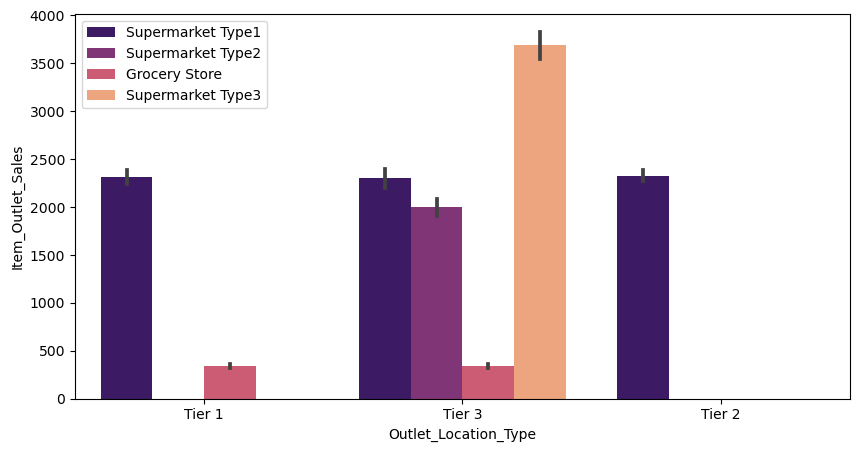

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=df_train, palette='magma')
plt.legend()

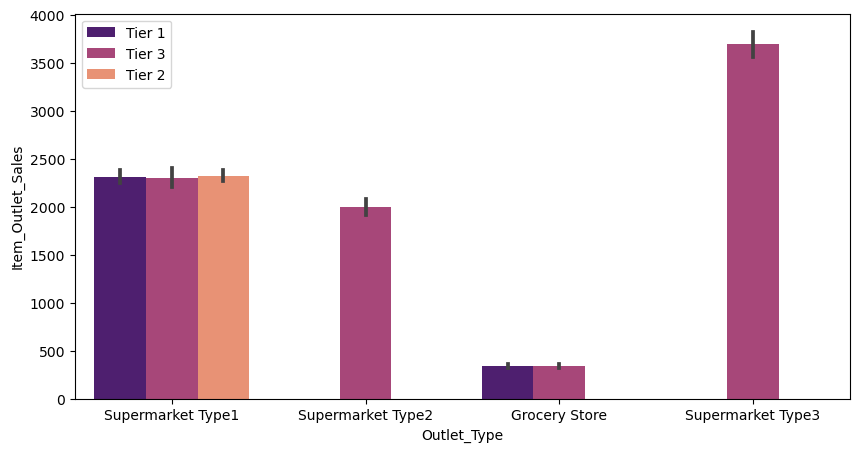

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df_train,palette='magma')
plt.legend()

- Seafood is the most item_type sold in SuperMarket 1 and 2, Grocery store has less sales.
- Only Teir3 has all Outlet_Type, and SuperMarket type3 has most sales..
- Outlet_Location_Type has almost equal sales based on Item_Type_combined.

# Encoding

- Lable Encoder : Item_Fat_Content, Outlet_Size, Outlet_Location_Type

- One-hot Encoder : Item_Type, Outlet_Identifier, Outlet_Type

**Lable Encoding**

In [45]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_train['Item_Fat_Content']=label.fit_transform(df_train['Item_Fat_Content'])
df_train['Outlet_Size']=label.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=label.fit_transform(df_train['Outlet_Location_Type'])

**One Hot Encoding**

In [46]:
df=pd.get_dummies(df_train['Item_Type'])
df_train=pd.concat([df_train, df], axis=1)

df=pd.get_dummies(df_train['Outlet_Identifier'])
df_train=pd.concat([df_train, df], axis=1)

df=pd.get_dummies(df_train['Outlet_Type'])
df_train=pd.concat([df_train, df], axis=1)

In [47]:
df_train=df_train.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8295 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Baking Goods               8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

# Future Engneering

> The main feature engineering techniques are:

- Correlation Matrix
- Mutual Information Gain
- Anova Test

**Correlation Matix**

<AxesSubplot: >

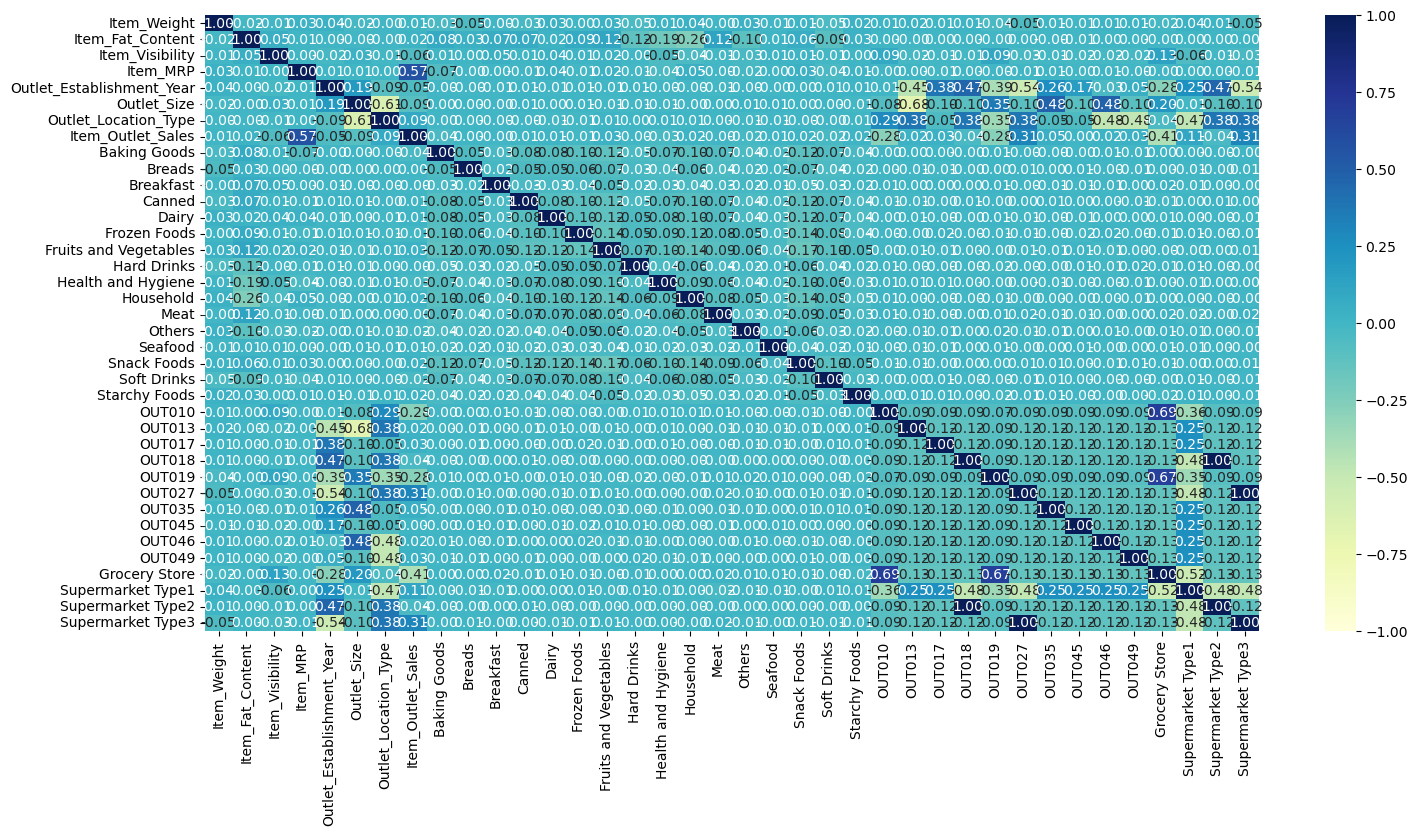

In [49]:
corr_matrix = df_train.corr()
plt.figure(figsize=(17,8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmax=1, vmin=-1, fmt='.2f')

> Item_MRP and Item_Outlet_Sales are 57% Correlated

**Mutual Information Gain**

In [50]:
x = df_train.iloc[:,0:12]
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,443.4228,0,0,0,0
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,732.3800,0,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,994.7052,0,0,0,0


In [51]:
y = df_train.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Supermarket Type3, dtype: uint8

In [69]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
importances = mutual_info_regression(x,y)
importances

array([0.22948687, 0.00042609, 0.00243915, 0.        , 0.22950208,
       0.05778813, 0.10873935, 0.05195946, 0.00288563, 0.        ,
       0.00340696, 0.00451278])

In [71]:
importance_list = pd.Series(importances)
feature_name_list = df_train.columns
print(feature_name_list)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Outlet_Sales', 'Baking Goods', 'Breads', 'Breakfast', 'Canned',
       'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'OUT010', 'OUT013',
       'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046',
       'OUT049', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')


In [72]:
df_feature_importance = pd.DataFrame()
df_feature_importance['Feature'] = feature_name_list
df_feature_importance['IG'] = importance_list
df_feature_importance.sort_values(by='IG', ascending=False)

,Feature,IG
4,Outlet_Establishment_Year,0.229502
0,Item_Weight,0.229487
6,Outlet_Location_Type,0.108739
5,Outlet_Size,0.057788
7,Item_Outlet_Sales,0.051959
11,Canned,0.004513
10,Breakfast,0.003407
8,Baking Goods,0.002886
2,Item_Visibility,0.002439
1,Item_Fat_Content,0.000426


<AxesSubplot: xlabel='IG', ylabel='Feature'>

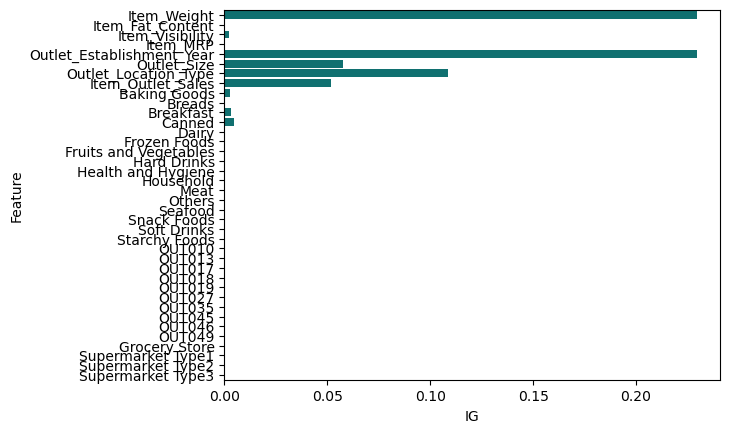

In [73]:
sns.barplot(x='IG', y='Feature', data=df_feature_importance, color='teal')

> Item_Weight, Outlet_Establishment_Year, Outlet_Location_Type and Item_Outlet_Sales are important features

**Anova Test**

In [74]:
x = df_train.iloc[:,0:12]
print(x.shape)
y = df_train.iloc[:,-1]
print(y.shape)

(8523, 12)
(8523,)


In [75]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=12)
x_selected = fs.fit(x,y)

In [76]:
print("P values")
np.round(x_selected.pvalues_,3)

P values


array([0.   , 0.987, 0.095, 0.535, 0.   , 0.   , 0.   , 0.   , 0.785,
       0.478, 0.743, 0.916])

In [77]:
print('f1 scores')
np.round(x_selected.scores_,3)

f1 scores


array([2.017000e+01, 0.000000e+00, 2.786000e+00, 3.840000e-01,
       3.472332e+03, 8.589000e+01, 1.466348e+03, 9.136570e+02,
       7.500000e-02, 5.040000e-01, 1.070000e-01, 1.100000e-02])

In [78]:
import math

def list_ceil(x):
    return [math.ceil(i) for i in x]
list_ceil(x_selected.scores_)

[21, 1, 3, 1, 3473, 86, 1467, 914, 1, 1, 1, 1]

In [79]:
#creating dataframe of f1scores & pvalues

df_anova = pd.DataFrame()
list_pvalues = pd.Series(np.round(x_selected.pvalues_,3))
list_fscores = list_ceil(x_selected.scores_)
list_cols    = x.columns
df_anova['Features'] = list_cols
df_anova['F scores'] = list_fscores
df_anova['Pvalues']  = list_pvalues
df_anova.sort_values(by='F scores', ascending=False)

,Features,F scores,Pvalues
4,Outlet_Establishment_Year,3473,0.000
6,Outlet_Location_Type,1467,0.000
7,Item_Outlet_Sales,914,0.000
5,Outlet_Size,86,0.000
0,Item_Weight,21,0.000
2,Item_Visibility,3,0.095
1,Item_Fat_Content,1,0.987
3,Item_MRP,1,0.535
8,Baking Goods,1,0.785
9,Breads,1,0.478


<AxesSubplot: xlabel='F scores', ylabel='Features'>

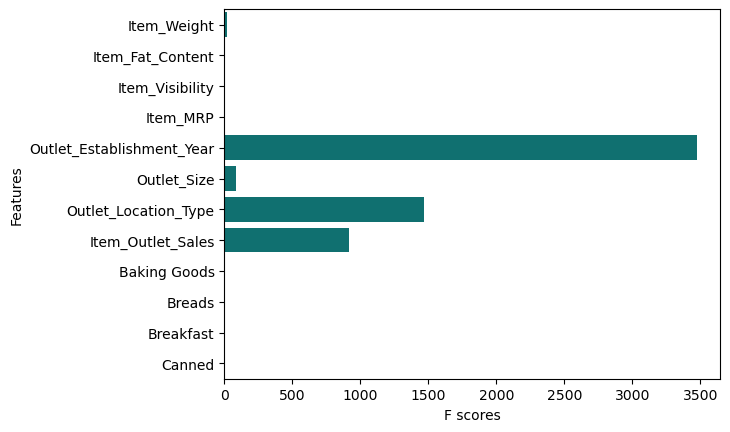

In [80]:
sns.barplot(x='F scores', y='Features', data=df_anova, color='teal')

> The result is very significant that after the ANOVA Test. We find out that Outlet_Establishment_Year, Outlet_Location_Type and Item_Outlet_Sales are the important features.

# Splitting the Dataset

> Let's divide our dataset into two variables.

- X as the features we defined earlier.
- y as the Item_Outlet_Sales the target value we want to predict.
- This is a regression problem.
- Train test split 8:2 ratio respectively.

In [81]:
x_orig = df_train.drop('Item_Outlet_Sales', axis=1)
y_orig = pd.DataFrame(df_train['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])

In [82]:
y_orig.shape

(8523, 1)

In [83]:
x_orig.shape

(8523, 37)

# Model Building

**Regression Models**

- 1. Linear Regression
- 2. Lasso Regressor
- 3. Ridge Regression
- 4. Decision Tree Regressor
- 5. Random Forest Regressor
- 6. XGBoost Regressor
- 7. Support Vector Regressor
- 8. KNN Regressor

# Linear Regression

In [84]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5445176886401346
RMSE: 1186.979325702826


# Lasso Regression

**Regularization:**
> When indepdent veriables/ Features have large coefficients/slope, it can be computationaly expensive, So we do regulariation technique to reduce regression cefficients/slope and model complexicity.

> Types of Regularization

- 1. Ridge Regression
- 2. Lasso Regression

In [85]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Lasso
model = Lasso(max_iter=10e5)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE is coming greater than 1, which is more than the expected range of 0 to 1 when the data is standard scaled.

R2 score -0.00024579770948407464
RMSE: 1758.9794452421588


# Ridge Regression

In [86]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Ridge
model = Ridge(max_iter=10e5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

np.sum(model.coef_ != 0)

R2 score 0.5445712038165416
RMSE: 1186.9095938248431


37

# Decision Tree Regressor

In [87]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=2)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.24591648972585145
RMSE: 1527.2745637525913


# Random Forest

In [88]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.547783819543906
RMSE: 1182.715927657161


# KNN

In [89]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.neighbors import KNeighborsRegressor
score_max=0
rmse_max=0
i_max=0
for i in range(1,20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_test = scale.inverse_transform(y_test)
    y_pred = scale.inverse_transform(y_pred)
    
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    if (rmse > rmse_max):
        rmse_max=rmse
        score_max=r2
        i_max=i
                   
print("R2_score", score_max)
print('RMSE:', rmse_max)
print("Neighbour", i_max)

R2_score -1.5090299568567342
RMSE: 4.19192206387387e+61
Neighbour 19


# SVM

In [90]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5702131359435032
RMSE: 1153.0123672446575


# XGBOOST

In [91]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5163178118826662
RMSE: 1223.1717551566446


- Best Model : SVM
- Score:
> - R2 score: 0.5702131359435032
> - RMSE: 1153.0123672446575


# SVM using cross validation score

In [92]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=5, shuffle=True)

from sklearn.svm import SVR
model = SVR()

from sklearn.model_selection import cross_val_score
score=cross_val_score(model, x, y, cv=kfold, scoring='r2')

print(score.mean())

0.5818517891736952


# Preparing the TEST data

In [93]:
df_train=pd.read_csv('train.csv')
train_orig=df_train

In [94]:
df_test=pd.read_csv('test.csv')
test_orig=df_test

In [95]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('LF', 'Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace('reg', 'Regular')

#df_train=df_train.drop(['Item_Weight', 'Item_Identifier', 'Outlet_Size', 'Item_Visibility'], axis=1)

df_train['Item_Visibility']=df_train[df_train['Item_Visibility']<0.18]['Item_Visibility']
df_train['Item_Weight']=df_train['Item_Weight'].fillna(12.15)
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna('Medium')
df_train['Item_Visibility']=df_train['Item_Visibility'].fillna(0.06181292964400241)

df_train=df_train.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_train['Item_Fat_Content']=label.fit_transform(df_train['Item_Fat_Content'])
df_train['Outlet_Size']=label.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=label.fit_transform(df_train['Outlet_Location_Type'])

df=pd.get_dummies(df_train['Item_Type'])
df_train=pd.concat([df_train, df], axis=1)
df=pd.get_dummies(df_train['Outlet_Identifier'])
df_train=pd.concat([df_train, df], axis=1)
df=pd.get_dummies(df_train['Outlet_Type'])
df_train=pd.concat([df_train, df], axis=1)

df_train=df_train.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [96]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('LF', 'Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace('reg', 'Regular')

#df_test=df_test.drop(['Item_Weight', 'Item_Identifier', 'Outlet_Size', 'Item_Visibility'], axis=1)

df_test['Item_Visibility']=df_test[df_test['Item_Visibility']<0.18]['Item_Visibility']

df_test['Item_Weight']=df_test['Item_Weight'].fillna(12.15)
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna('Medium')
df_test['Item_Visibility']=df_test['Item_Visibility'].fillna(0.06181292964400241)

df_test=df_test.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_test['Item_Fat_Content']=label.fit_transform(df_test['Item_Fat_Content'])
df_test['Outlet_Size']=label.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']=label.fit_transform(df_test['Outlet_Location_Type'])

df=pd.get_dummies(df_test['Item_Type'])
df_test=pd.concat([df_test, df], axis=1)
df=pd.get_dummies(df_test['Outlet_Identifier'])
df_test=pd.concat([df_test, df], axis=1)
df=pd.get_dummies(df_test['Outlet_Type'])
df_test=pd.concat([df_test, df], axis=1)

df_test=df_test.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)


In [97]:
df_train['Outlet_Size'].unique()


array([1, 0, 2])

In [98]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(df_train.drop('Item_Outlet_Sales', axis=1))
x_test=scale.fit_transform(df_test)
y = scale.fit_transform(pd.DataFrame(df_train['Item_Outlet_Sales'], columns=['Item_Outlet_Sales']))

from sklearn.svm import SVR
model = SVR()
model.fit(x,y)

y_pred=pd.DataFrame(model.predict(x_test))
y_pred=scale.inverse_transform(y_pred)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_pred.shape)

(8523, 37)
(8523, 1)
(5681, 37)
(5681, 1)


In [99]:
a=pd.DataFrame(test_orig[['Item_Identifier', 'Outlet_Identifier']], columns=['Item_Identifier', 'Outlet_Identifier'])
b=pd.DataFrame(abs(y_pred), columns=['Item_Outlet_Sales'])

new=pd.concat([a,b], axis=1)

display(new)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1487.126706
1,FDW14,OUT017,1443.815251
2,NCN55,OUT010,861.524015
3,FDQ58,OUT017,2592.466361
4,FDY38,OUT027,6397.812554
...,...,...,...
5676,FDB58,OUT046,2265.663055
5677,FDD47,OUT018,2494.496805
5678,NCO17,OUT045,1646.867665
5679,FDJ26,OUT017,3972.327368


In [100]:
new[new['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [101]:
new.to_csv('submission_big_mart.csv', index=False)

In [102]:
df2_train=pd.read_csv('train.csv')
df2_train[(df2_train['Item_Identifier']=='NCR42') | (df2_train['Outlet_Identifier']=='OUT019')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,NaN,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,NaN,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,NaN,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,NaN,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [103]:
df2_test=pd.read_csv('test.csv')
df2_test[(df2_test['Item_Identifier']=='NCR42') | (df2_test['Outlet_Identifier']=='OUT019')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store
30,NCR42,NaN,Low Fat,0.067377,Household,32.0900,OUT019,1985,Small,Tier 1,Grocery Store
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
76,FDV21,NaN,Low Fat,0.299544,Snack Foods,124.8704,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5546,FDL45,NaN,Low Fat,0.065987,Snack Foods,126.6704,OUT019,1985,Small,Tier 1,Grocery Store
5583,NCG18,NaN,Low Fat,0.040231,Household,101.2332,OUT019,1985,Small,Tier 1,Grocery Store
5596,FDJ15,NaN,Regular,0.040835,Dairy,185.0608,OUT019,1985,Small,Tier 1,Grocery Store
5600,FDA07,NaN,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,1985,Small,Tier 1,Grocery Store


array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

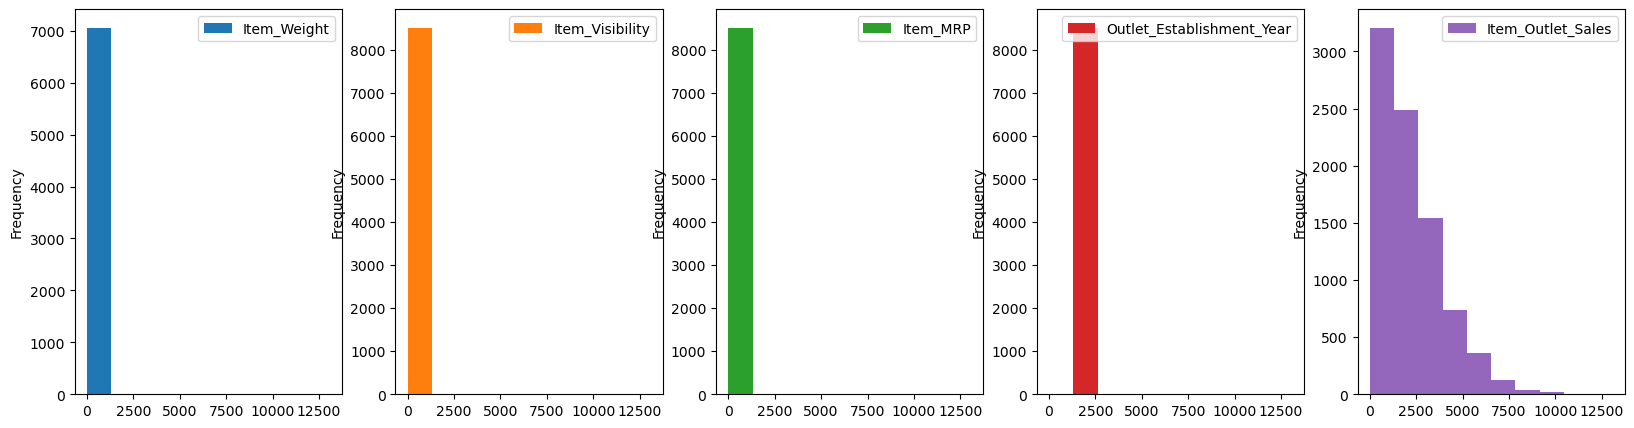

In [104]:
df2_train.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

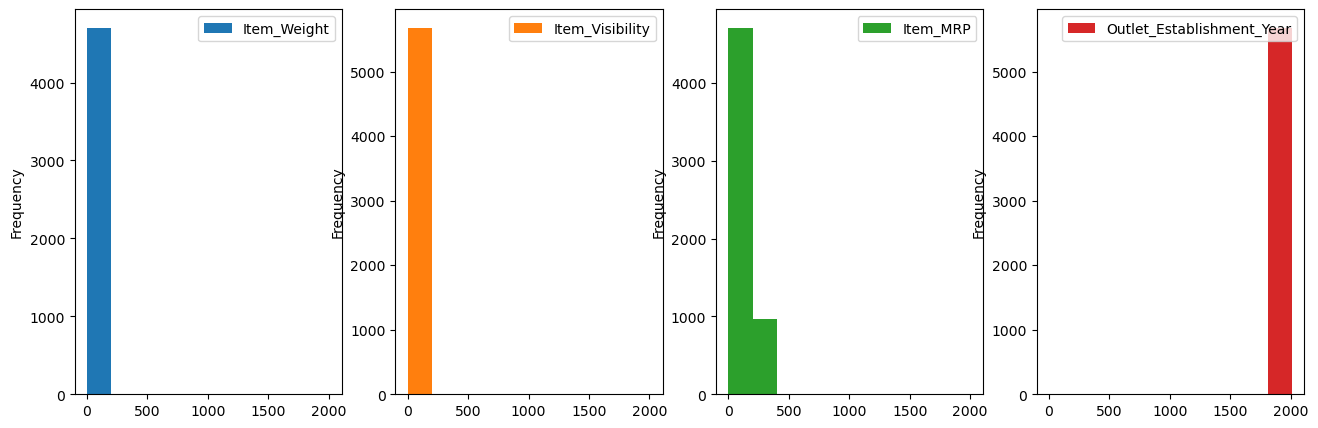

In [105]:
df2_test.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

# END !